# Credit Risk Classification

Credit risk poses a classification problem that’s inherently imbalanced. This is because healthy loans easily outnumber risky loans. In this Challenge, you’ll use various techniques to train and evaluate models with imbalanced classes. You’ll use a dataset of historical lending activity from a peer-to-peer lending services company to build a model that can identify the creditworthiness of borrowers.

## Instructions:

This challenge consists of the following subsections:

* Split the Data into Training and Testing Sets

* Create a Logistic Regression Model with the Original Data

* Predict a Logistic Regression Model with Resampled Training Data 

### Split the Data into Training and Testing Sets

Open the starter code notebook and then use it to complete the following steps.

1. Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

2. Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

    > **Note** A value of `0` in the “loan_status” column means that the loan is healthy. A value of `1` means that the loan has a high risk of defaulting.  

3. Check the balance of the labels variable (`y`) by using the `value_counts` function.

4. Split the data into training and testing datasets by using `train_test_split`.

### Create a Logistic Regression Model with the Original Data

Employ your knowledge of logistic regression to complete the following steps:

1. Fit a logistic regression model by using the training data (`X_train` and `y_train`).

2. Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

3. Evaluate the model’s performance by doing the following:

    * Calculate the accuracy score of the model.

    * Generate a confusion matrix.

    * Print the classification report.

4. Answer the following question: How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

### Predict a Logistic Regression Model with Resampled Training Data

Did you notice the small number of high-risk loan labels? Perhaps, a model that uses resampled data will perform better. You’ll thus resample the training data and then reevaluate the model. Specifically, you’ll use `RandomOverSampler`.

To do so, complete the following steps:

1. Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

2. Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

3. Evaluate the model’s performance by doing the following:

    * Calculate the accuracy score of the model.

    * Generate a confusion matrix.

    * Print the classification report.
    
4. Answer the following question: How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

### Write a Credit Risk Analysis Report

For this section, you’ll write a brief report that includes a summary and an analysis of the performance of both machine learning models that you used in this challenge. You should write this report as the `README.md` file included in your GitHub repository.

Structure your report by using the report template that `Starter_Code.zip` includes, and make sure that it contains the following:

1. An overview of the analysis: Explain the purpose of this analysis.


2. The results: Using bulleted lists, describe the balanced accuracy scores and the precision and recall scores of both machine learning models.

3. A summary: Summarize the results from the machine learning models. Compare the two versions of the dataset predictions. Include your recommendation for the model to use, if any, on the original vs. the resampled data. If you don’t recommend either model, justify your reasoning.

In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [7]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
data = Path("Resources/lending_data.csv")
df = pd.read_csv(data)

# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [8]:
# Separate the data into labels and features
y = df["loan_status"]
X = df.drop(columns="loan_status")

# Separate the y variable, the labels

# Separate the X variable, the features
# YOUR CODE HERE!

In [10]:
# Review the y variable Series
# YOUR CODE HERE!
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [12]:
# Review the X variable DataFrame
# YOUR CODE HERE!
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [13]:
# Check the balance of our target values
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [14]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape

(54275, 7)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [15]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
# YOUR CODE HERE!
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [17]:
# Make a prediction using the testing data
pred_test = logistic_regression_model.predict(X_test)
pred_test

array([0, 0, 0, ..., 0, 0, 0])

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [19]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import accuracy_score
balanced_accuracy_score = accuracy_score(y_test, pred_test)
balanced_accuracy_score

0.9920037831563562

<AxesSubplot:>

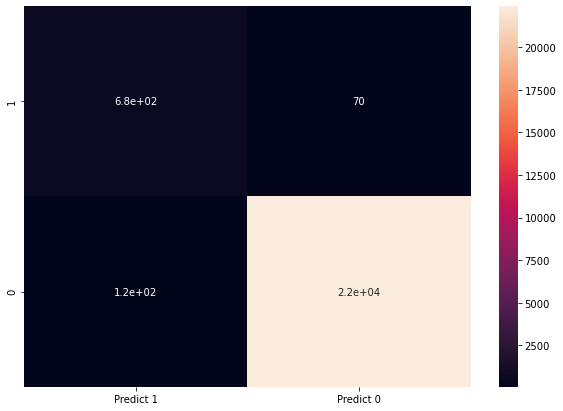

In [23]:
# Generate a confusion matrix for the model
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, pred_test, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)],
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10, 7))
plt.ylabel('true label')
plt.xlabel('predicted label')
sns.heatmap(df_cm, annot=True)

In [27]:
# Print the classification report for the model
from sklearn.metrics import classification_report
report_dict = classification_report(y_test, pred_test, output_dict=True)
pd.DataFrame(report_dict)


,0,1,accuracy,macro avg,weighted avg
precision,0.996885,0.853535,0.992004,0.925210,0.992287
recall,0.994848,0.906166,0.992004,0.950507,0.992004
f1-score,0.995865,0.879064,0.992004,0.937464,0.992119
support,22515.000000,746.000000,0.992004,23261.000000,23261.000000


### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** an excellent prediction at 99% for 0 (healthy loans) and for 1 (high-risk loans).

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [31]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
random_oversampler = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_oversampler, y_oversampler = random_oversampler.fit_resample(X, y)
Xtrain, Xtest, ytrain, ytest= train_test_split(X_oversampler, y_oversampler)

In [29]:
# Count the distinct values of the resampled labels data
y_oversampler.value_counts()

1    75036
0    75036
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [33]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
# YOUR CODE HERE!
model.fit(Xtrain, ytrain)
# Make a prediction using the testing data
# YOUR CODE HERE!
pred_y = model.predict(Xtest)
pred_y

array([1, 0, 0, ..., 1, 1, 1])

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [34]:
# Print the balanced_accuracy score of the model 
# YOUR CODE HERE!
balanced_accuracy_score = accuracy_score(ytest, pred_y)
balanced_accuracy_score

0.9941894557279173

<AxesSubplot:>

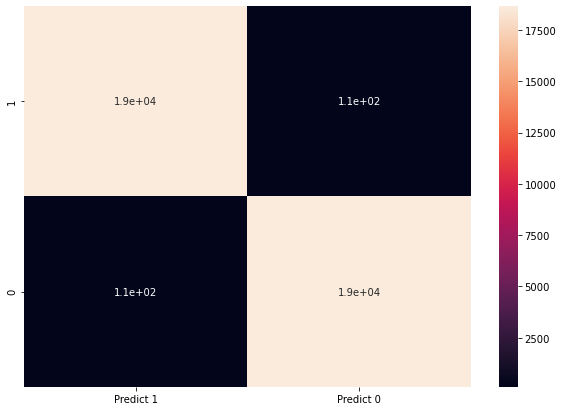

In [35]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!
cm = confusion_matrix(ytest, pred_y, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)],
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10, 7))
plt.ylabel('true label')
plt.xlabel('predicted label')
sns.heatmap(df_cm, annot=True)

In [36]:
# Print the classification report for the model
report_dict = classification_report(ytest, pred_y, output_dict=True)
pd.DataFrame(report_dict)

,0,1,accuracy,macro avg,weighted avg
precision,0.994188,0.994191,0.994189,0.994189,0.994189
recall,0.994188,0.994191,0.994189,0.994189,0.994189
f1-score,0.994188,0.994191,0.994189,0.994189,0.994189
support,18755.000000,18763.000000,0.994189,37518.000000,37518.000000


### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model fitted with oversampled data predicts at 99% accuracy so is excellent. The precision of '1' increased from 85% to 99% in the final model. 